# 3.1 - Más testeo de hipótesis

# ANOVA

### testeo de más de dos muestras

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

##### F de Snedecor

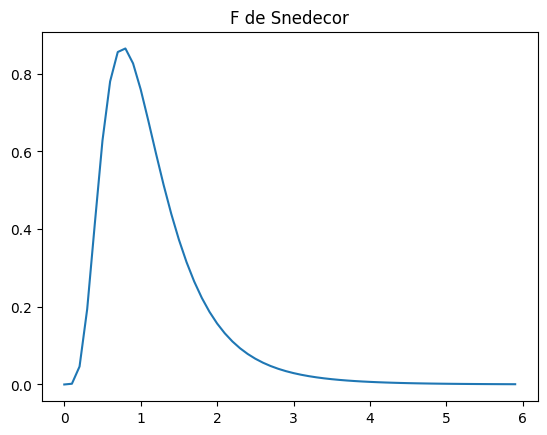

In [2]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

In [3]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -3, 1) for x in x]
y2=[norm.pdf(x, 1, 2) for x in x]
y3=[norm.pdf(x, 4, 1.5) for x in x]

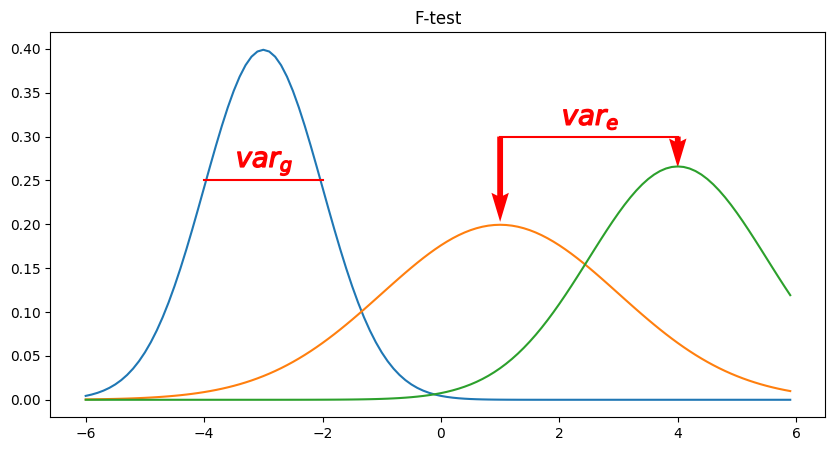

In [4]:
plt.figure(figsize=(10,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(-3, 0.27, marker='$var_g$', color='r', ms=40)
plt.plot(2.5, 0.32, marker='$var_e$', color='r', ms=40)

plt.plot([-4,-3,-2], [.25, .25, .25], color='r')
plt.plot([1,2,3,4], [.3, .3, .3, .3], color='r')

plt.quiver(1, 0.3, 0, -1.1, color='r', scale=10)
plt.quiver(4, 0.3, 0, -0.4, color='r', scale=10)

plt.title('F-test');

$F-test =$ Varianza entre los grupos / Varianza del grupo

$F-test = \frac{\sigma_e^2}{\sigma_g^2}$

### Ejemplo Plantas

**ANOVA One-Way** : Una variable independiente y una dependiente, similaridad basada en la media y en el f_score.


Supongamos que tenemos dos fertilizantes distintos y probamos su eficacia. Se tienen 3 grupos, el grupo de control (no se aplica fertilizante), y un grupo para cada uno de los fertilizantes.

Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3$  (no hay diferencia significativa entre los grupos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un grupo)

In [5]:
df=pd.read_csv('../data/PlantGrowth.csv')

df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [6]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [7]:
grupos=df.group.unique()

In [8]:
df.weight[df.group=='ctrl']

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [9]:
data={g: df.weight[df.group==g] for g in grupos}

data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [10]:
f_score, p_value = f_oneway(data['ctrl'], data['trt1'], data['trt2'])

f_score, p_value

(4.846087862380136, 0.0159099583256229)

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos un grupo.

In [11]:
data['ctrl'].mean(), data['ctrl'].std()

(5.031999999999999, 0.5830913783924057)

In [12]:
data['trt1'].mean(), data['trt1'].std()

(4.661, 0.7936756964347033)

In [13]:
data['trt2'].mean(), data['trt2'].std()

(5.526, 0.44257328332278606)

### Ejemplo Ciudades

Se tiene un rating de 6 ciudades diferentes.

Las hipótesis son:

$H0 : \mu_1=\ldots=\mu_6$  (no hay diferencia significativa entre las ciudades)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos una ciudad)

In [14]:
rate=pd.read_csv('../data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [15]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6])

In [16]:
rate[rate.City==2]

,Rate,City
9,14.25,2
10,13.00,2
11,12.75,2
12,12.50,2
13,12.50,2
14,12.40,2
15,12.30,2
16,11.90,2
17,11.90,2


In [17]:
rate['city_index']=rate.groupby('City').cumcount()

rate

,Rate,City,city_index
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4
5,13.00,1,5
6,13.00,1,6
7,12.75,1,7
8,12.50,1,8
9,14.25,2,0


In [18]:
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_index')

rate_pivot

City,1,2,3,4,5,6
city_index,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [19]:
rate.shape

(54, 3)

In [20]:
rate_pivot.shape

(9, 6)

In [21]:
rate_pivot[1]

city_index
0    13.75
1    13.75
2    13.50
3    13.50
4    13.00
5    13.00
6    13.00
7    12.75
8    12.50
Name: 1, dtype: float64

In [22]:
# f_oneway(rate_pivot[1], rate_pivot[2], rate_pivot[3]...............)

# el asterisco es entrada de n muestras. n argumentos de entrada de la funcion

f_oneway(*[rate_pivot[i] for i in range(1, 7)])  

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

In [23]:
f_oneway(*[rate[rate.City==i].Rate for i in range(1, 7)])  

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

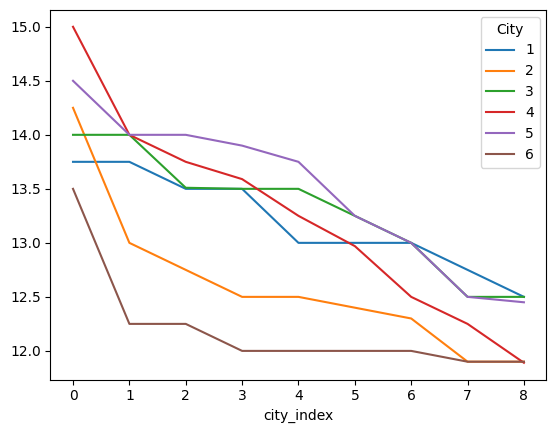

In [55]:
rate_pivot.plot();

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos una ciudad.

In [29]:
# con statsmodels

formula = 'Rate ~ C(City)'   

# La variable Rate va como (o es proporcional a) la categoria ciudad
# C() significa categoria

In [31]:
modelo=ols(formula=formula, data=rate).fit()

anova=sm.stats.anova_lm(modelo, typ=1)   # typ=1 es one way

anova

,df,sum_sq,mean_sq,F,PR(>F)
C(City),5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


##### F-test a mano

In [32]:
data=np.array([[1,2,3], [4,5,6], [7,8,9]]).T
data

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [33]:
data.shape

(3, 3)

In [34]:
n=data.shape[0]
m=data.shape[1]

media=data.mean()

col_medias=data.mean(axis=0)   # por muestra

s_c_entre_grupos=(((col_medias-media)**2)*n).sum()
dof_sceg=m-1

s_c_grupo=((data-col_medias)**2).sum()
dof_scg=m*(n-1)

In [35]:
f_score=(s_c_entre_grupos/dof_sceg) / (s_c_grupo/dof_scg)

f_score

27.0

In [36]:
1 - f(dof_sceg, dof_scg).cdf(f_score)  # p_value

0.0010000000000000009

##### con scipy

In [37]:
f_oneway(data[:, 0], data[:, 1], data[:,2])

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

### Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [38]:
df=pd.read_csv('../data/crop_yield.csv')

df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [39]:
df.Fert.unique()

array(['A', 'B'], dtype=object)

In [40]:
df.Water.unique()

array(['High', 'Low'], dtype=object)

In [41]:
df.Yield.unique()

array([27.4, 33.6, 29.8, 35.2, 33. , 34.8, 27. , 30.2, 30.8, 26.4, 32. ,
       32.2, 26. , 33.4, 26.8, 23.2, 29.4, 19.4, 23.8])

In [42]:
formula='Yield ~ C(Fert) + C(Water)'

modelo=ols(formula, df).fit()

modelo

In [43]:
modelo.fvalue

5.430482726711909

In [44]:
modelo.f_pvalue  # al menos uno de los 4 es distinto

0.015008885925143444

In [45]:
anova=sm.stats.anova_lm(modelo, typ=2)   # typ=2 es two way

anova   # la importancia de fert y water, los pvalores

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


### MANOVA (ANOVA Multivariante)

In [46]:
from statsmodels.multivariate.manova import MANOVA

In [47]:
df=pd.read_csv('../data/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [48]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [49]:
df.columns=df.columns.str.replace('.', '_')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [50]:
formula='sepal_length + sepal_width + petal_length + petal_width ~ C(variety)'

In [52]:
manova=MANOVA.from_formula(formula, data=df)

print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       C(variety)        Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

In [75]:
manova.pvalue

AttributeError: 'MANOVA' object has no attribute 'pvalue'

In [53]:
df.shape

(150, 5)

### $\chi^2$

**ji-dos, chi-dos, chi-cuadrado...**

**Independencia (H0: Si, H1: No)**

In [56]:
chi2_contingency

<function scipy.stats.contingency.chi2_contingency(observed, correction=True, lambda_=None)>

In [76]:
rate_pivot[[1, 3]].head()

City,1,3
city_index,,
0,13.75,14.00
1,13.75,14.00
2,13.50,13.51
3,13.50,13.50
4,13.00,13.50


In [66]:
ji_dos, pval, dof, ex = chi2_contingency(rate_pivot[[1, 3]])

ji_dos, pval, dof, ex

(0.014521659890636323,
 0.9999999998848639,
 8,
 array([[13.8162446 , 13.9337554 ],
        [13.8162446 , 13.9337554 ],
        [13.44781141, 13.56218859],
        [13.44283259, 13.55716741],
        [13.19389124, 13.30610876],
        [13.06942057, 13.18057943],
        [12.9449499 , 13.0550501 ],
        [12.57153788, 12.67846212],
        [12.44706721, 12.55293279]]))

**Conclusion**

$p_v > 0.05$, no se rechaza H0, son independientes.

**para una poblacion que tenga dos variables categoricas**

**¿Existe asociacion significativa entre las dos?  (H0: No, H1: Si)**

In [67]:
df=pd.read_csv('../data/chi-test.csv')

df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


In [68]:
cross=pd.crosstab(df['Gender'], df['Like Shopping?'])

cross

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [69]:
ji_dos, pval, dof, ex = chi2_contingency(cross)

pval

1.0

In [70]:
# a mano

chi_square=([(f-e)**2./e for f,e in zip(cross.values, ex)])

chi_statistic=sum(chi_square)

p_value=1-chi2.cdf(x=chi_statistic, df=dof)

p_value

array([0.82306327, 0.84148058])

In [71]:
chi_square

[array([0.02222222, 0.01777778]), array([0.02777778, 0.02222222])]

In [72]:
chi_statistic

array([0.05, 0.04])

**Conclusion**

$p_v > 0.05$, no se rechaza H0, no existe asociacion significativa entre los grupos.